In [73]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Classification Overview</h4>
<ul>
<li>Predict a binary class as output based on given features.
</li>

<li>Examples: Do we need to follow up on a customer review? Is this transaction fraudulent or valid one? Are there signs of onset of a medical condition or disease? Is this considered junk food or not?</li>

<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>

<li><b>Logistic Regression</b>. Estimated Probability = <b>sigmoid</b>(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub>)<br>
where, w is the weight and x is the feature
</li>
<li>Linear model output is fed thru a sigmoid or logistic function to produce the probability.</li>
<li>Predicted Value: Probability of a binary outcome.  Closer to 1 is positive class, closer to 0 is negative class</li>
<li>Algorithm Used: Logistic Regression. Objective is to find the weights w that maximizes separation between the two classes</li>
<li>Optimization: Stochastic Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Logistic loss function</li>
</ul>

In [31]:
# Sigmoid or logistic function
# For any x, output is bounded to 0 & 1.
def sigmoid_func(x):
    return 1.0/(1+math.exp(-x))

In [32]:
sigmoid_func(3)

0.9525741268224334

In [33]:
sigmoid_func(78)

1.0

In [36]:
sigmoid_func(-100)

3.7200759760208356e-44

Example Dataset - Hours spent and Exam Results: 
https://en.wikipedia.org/wiki/Logistic_regression

Sigmoid function produces an output between 0 and 1 no.  Input closer to 0 produces and output of 0.5 probability.  Negative input produces value less than 0.5 while positive input produces value greater than 0.5

- load the dataset

In [2]:
df = pd.read_csv('HoursExamResult.csv')

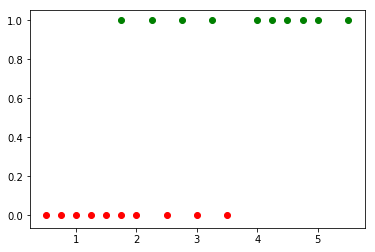

In [13]:
plt.scatter(df[df['Pass']==0]['Hours'], df[df['Pass']==0]['Pass'], color='r')
plt.scatter(df[df['Pass']==1]['Hours'], df[df['Pass']==1]['Pass'], color='g')

In [25]:
#y = 1.5046 x + −4.0777
def linear(x):
    return x * 1.5046 + -4.0777

(-0.5, 1.5)

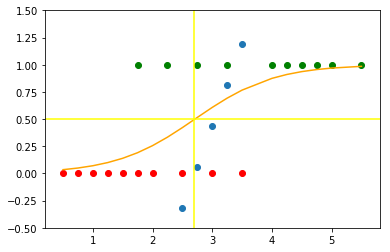

In [78]:
plt.scatter(df[df['Pass']==0]['Hours'], df[df['Pass']==0]['Pass'], color='r')
plt.scatter(df[df['Pass']==1]['Hours'], df[df['Pass']==1]['Pass'], color='g')
y_lr = [linear(x) for x in df['Hours']]
y_sig = [sigmoid_func(x) for x in y_lr]
plt.scatter(df['Hours'],y_lr )
plt.plot(df['Hours'], y_sig, color='orange')
plt.axhline(0.5, color='yellow')
plt.axvline(2.7, color='yellow')
plt.ylim(-0.5,1.5)

In [40]:
df['lr'] = y_lr
df['sig']= y_sig

In [48]:
df['pred'] = 0

In [59]:
df.drop('pred', inplace=True, axis=1)

In [61]:
df['pred'] = [1 if sig > 0.5 else 0 for sig in df['sig'] ]

In [63]:
df

,Hours,Pass,lr,sig,pred
0,0.50,0,-3.32540,0.034710,0
1,0.75,0,-2.94925,0.049772,0
2,1.00,0,-2.57310,0.070890,0
3,1.25,0,-2.19695,0.100025,0
4,1.50,0,-1.82080,0.139338,0
5,1.75,0,-1.44465,0.190826,0
6,1.75,1,-1.44465,0.190826,0
7,2.00,0,-1.06850,0.255688,0
8,2.25,1,-0.69235,0.333511,0
9,2.50,0,-0.31620,0.421602,0


In [66]:
sum(df['pred'] == df['Pass'])/ len(df)

0.8

In [67]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(df['Pass'], df['pred'])

array([[8, 2],
       [2, 8]], dtype=int64)

In [71]:
tn, fp, fn, tp = confusion_matrix(df['Pass'], df['pred']).ravel()

In [72]:
tn, fp, fn, tp

(8, 2, 2, 8)

- create a function based on what wikipedia says about the linear equation coeff and weight

- create y values using the hours from the dataframe . use map

- scatter plot df.Hours and y_linear
- scatter plot df.Hours of pass and df.Pass of pass using color='g'
- scatter plot df.Hours of fail and df.Pass of fail using color='r'

- Generate probability by running the y values through sigmoid function

- Replot the values